In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
sns.set(rc={'figure.figsize': (15, 8)})

In [260]:
from sklearn.linear_model import LinearRegression

In [261]:
path = "data/"
file_CO2 = "CAIT Country GHG Emissions - csv 10022017/CAIT Country CO2 Emissions.csv"

In [262]:
df = pd.read_csv(path+file_CO2, header=1)

In [263]:
df.columns

Index(['Country', 'Year',
       'Total CO2 Emissions Excluding Land-Use Change and Forestry (MtCO2)'],
      dtype='object')

In [264]:
df.dtypes

Country                                                                object
Year                                                                    int64
Total CO2 Emissions Excluding Land-Use Change and Forestry (MtCO2)    float64
dtype: object

In [265]:
df = df.rename(columns={"Total CO2 Emissions Excluding Land-Use Change and Forestry (MtCO2)" : "CO2_Emissions(MtCO2)" })

In [266]:
df

,Country,Year,CO2_Emissions(MtCO2)
0,Afghanistan,1850,NaN
1,Albania,1850,NaN
2,Algeria,1850,NaN
3,Andorra,1850,NaN
4,Angola,1850,NaN
...,...,...,...
31840,Vietnam,2014,174.5552
31841,World,2014,34701.3739
31842,Yemen,2014,24.2678
31843,Zambia,2014,4.2855


In [267]:
table = pd.pivot_table(df, values="CO2_Emissions(MtCO2)", index=["Country"],columns=["Year"], aggfunc=np.sum, dropna=True)
table.shape

(193, 165)

In [268]:
table.loc["tot/an"] = table.sum()*0.1

Text(0.5, 1.0, "Evolution des émissions de gaz à effet de serre liées à la production d'énergie")

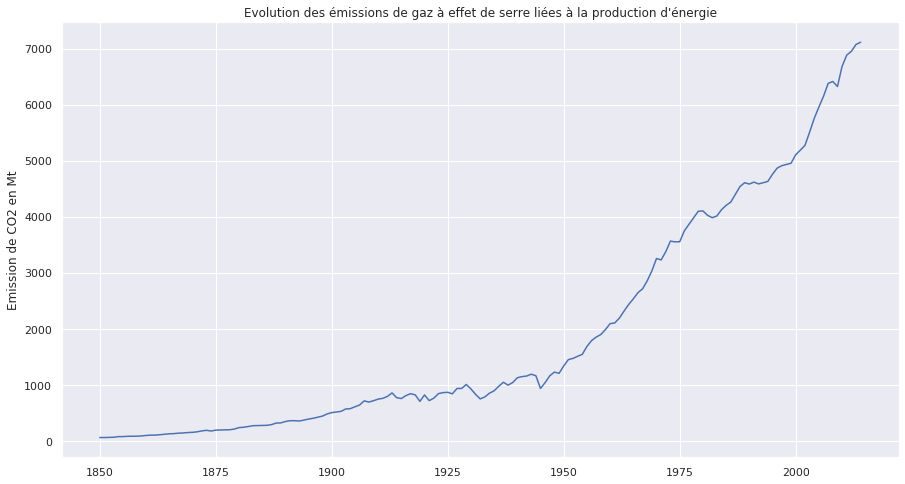

In [269]:
#plt.figure
ax = plt.plot(table.columns, table.loc["tot/an"])
plt.ylabel("Emission de CO2 en Mt")
plt.title("Evolution des émissions de gaz à effet de serre liées à la production d'énergie")

In [258]:
data = table.loc["tot/an"]
tips = px.data.tips()
fig = px.scatter(tips, x="total_bill", y="CO2_Emissions(MtCO2)", facet_col="smoker", color="sex", trendline="exp")
fig.show()

results = px.get_trendline_results(fig)
print(results)

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'] but received: CO2_Emissions(MtCO2)

In [308]:
def add_n_column(dataframe, n):
    for i in range(2015, 2015+n):
        dataframe[i]= np.nan
        

fig, ax = plt.subplots()

Categories = table.index

y_pos = np.arange(len(table.index))

r_quad = table.TOTAL

ax.bar(y_pos, r_quad, align='center', alpha=0.4, width=0.5)
plt.xticks(y_pos, Categories, weight=600)
ax.set_ylabel('Risque prédictif', weight=600)
ax.set_title('Risques prédictifs modèles')
plt.show()

In [173]:
file_production = "Total_Energy_production.csv"
file_consumption = "Total_Energy_consumption.csv"

In [174]:
df_production = pd.read_csv(path+file_production, header=2)
df_consumption = pd.read_csv(path+file_consumption, header=2, na_values=None)

In [175]:
df_production = df_production.dropna()
df_consumption = df_consumption.dropna()

In [176]:
df_production.columns

Index(['Unnamed: 0', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2017 - 2018 (%) ',
       '2000 - 2018 (%/year) '],
      dtype='object')

In [177]:
df_consumption.columns

Index(['Unnamed: 0', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2017 - 2018 (%) ',
       '2000 - 2018 (%/year) '],
      dtype='object')

In [178]:
df_production.drop(df_production.columns[[len(df_production.columns)-1,len(df_production.columns)-2]], axis=1, inplace=True)
df_consumption.drop(df_consumption.columns[[len(df_consumption.columns)-1,len(df_consumption.columns)-2]], axis=1, inplace=True)




In [179]:
df_production = df_production.set_index(["Unnamed: 0"]) 
df_consumption = df_consumption.set_index(["Unnamed: 0"]) 

In [180]:
df_production.loc["tot/an"] = df_production.sum()
df_consumption.loc["tot/an"] = df_consumption.sum()

In [181]:
todrop = ["World","OECD","G7","BRICS","Europe","European Union","CIS","North America","Latin America","Middle-East","Pacific","tot/an"]

In [182]:
df_production

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
World,8796.0,8813.0,8866.0,8902.0,9034.0,9251.0,9479.0,9602.0,9718.0,9727.0,...,12216.0,12791.0,13119.0,13298.0,13486.0,13716.0,13802.0,13754.0,14068.0,14468.0
OECD,3446.0,3476.0,3501.0,3499.0,3617.0,3679.0,3778.0,3809.0,3823.0,3799.0,...,3819.0,3897.0,3876.0,3906.0,3997.0,4159.0,4180.0,4080.0,4207.0,4408.0
G7,2535.0,2533.0,2546.0,2530.0,2636.0,2666.0,2711.0,2717.0,2736.0,2716.0,...,2623.0,2674.0,2676.0,2686.0,2757.0,2915.0,2945.0,2833.0,2953.0,3159.0
BRICS,2676.0,2619.0,2561.0,2522.0,2528.0,2604.0,2642.0,2626.0,2639.0,2666.0,...,4115.0,4428.0,4616.0,4655.0,4735.0,4790.0,4828.0,4742.0,4901.0,5071.0
Europe,1133.0,1133.0,1137.0,1148.0,1176.0,1207.0,1263.0,1259.0,1227.0,1228.0,...,1112.0,1118.0,1079.0,1073.0,1062.0,1044.0,1047.0,1044.0,1047.0,1043.0
European Union,955.0,945.0,933.0,937.0,953.0,968.0,1000.0,988.0,960.0,961.0,...,827.0,844.0,812.0,803.0,798.0,780.0,773.0,761.0,758.0,753.0
Belgium,13.0,13.0,13.0,12.0,12.0,12.0,12.0,13.0,13.0,14.0,...,15.0,16.0,16.0,14.0,15.0,13.0,11.0,15.0,15.0,12.0
Czech Republic,41.0,39.0,37.0,36.0,34.0,33.0,33.0,34.0,32.0,29.0,...,32.0,32.0,33.0,33.0,31.0,30.0,29.0,27.0,28.0,28.0
France,112.0,119.0,120.0,126.0,124.0,128.0,132.0,129.0,125.0,127.0,...,129.0,136.0,136.0,135.0,137.0,138.0,139.0,131.0,130.0,135.0


Text(0.5, 1.0, "Production d'énergie")

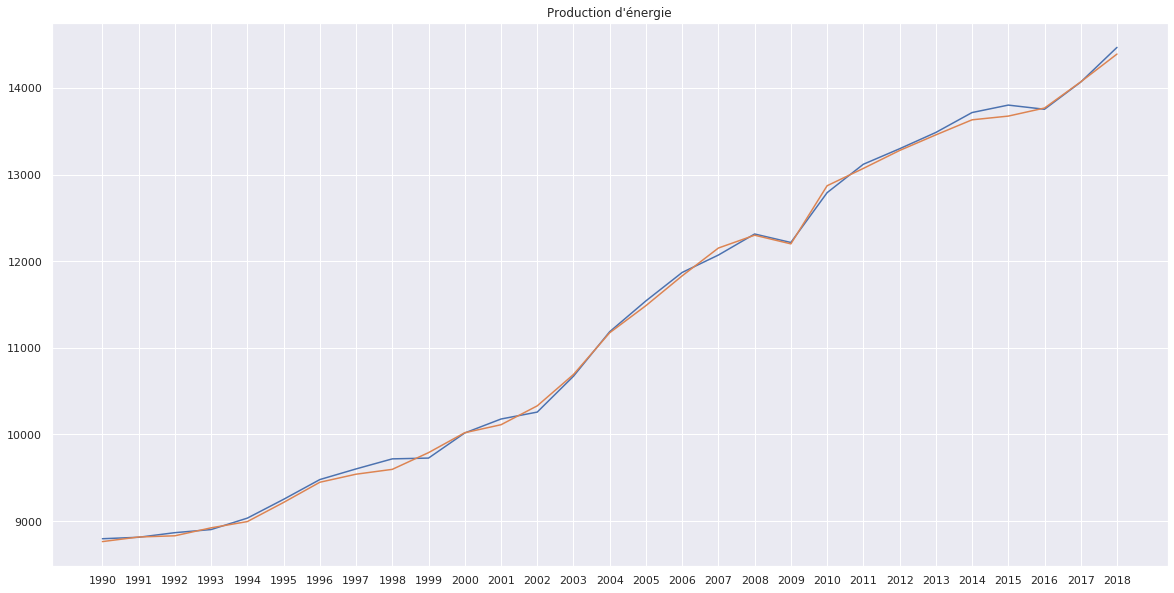

In [270]:
#plt.figure
fig = plt.figure(1, figsize=(20, 10))
ax1 = plt.plot(df_production.columns, df_production.loc["World"])
ax2 = plt.plot(df_consumption.columns, df_consumption.loc["World"])
#ax1([2000,2019])

#ax1.legend("dsf")

plt.title("Production d'énergie")

In [256]:
data = df_production.loc["World"]
tips = px.data.tips()
fig = px.scatter(tips, x="temps", y="consommation", facet_col="smoker", color="sex", trendline="ols")
fig.show()

results = px.get_trendline_results(fig)
print(results)

Empty DataFrame
Columns: []
Index: []


In [231]:
newdf = df_production.drop(todrop)

In [232]:
newdf2 = df_production.loc["World"]

In [224]:
newdf2 = newdf2.reset_index


In [243]:
X = pd.DataFrame(pd.to_numeric(newdf2.index))

In [234]:
X = (pd.to_numeric(newdf2.index) - newdf2.index[0]).years.reshape(-1, 1)


TypeError: can only perform ops with scalar values

In [245]:
y = newdf2[1]

model = LinearRegression().fit(X, y)
pred = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

TypeError: Singleton array array(8813.) cannot be considered a valid collection.